In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
with open('./data/colonypicktest.csv', 'r', encoding='utf-8-sig') as f: # because of the BOM and excel is stupid
# read in CSV files from data folder as a nunpy array
    csv = np.genfromtxt(f, delimiter=',', dtype='int')

data = csv.T.reshape(csv.size, 1)
#data = csv.reshape(1, csv.size)

In [4]:
data

array([[    39],
       [    27],
       [    29],
       [    87],
       [    42],
       [    32],
       [    27],
       [    34],
       [    38],
       [ 24943],
       [  5891],
       [ 72232],
       [  9091],
       [ 28849],
       [ 23496],
       [ 21726],
       [  2333],
       [ 17964],
       [ 23037],
       [  9533],
       [  9142],
       [ 15803],
       [ 13502],
       [143355],
       [ 16552],
       [ 18900],
       [ 26686],
       [ 12987],
       [ 12020],
       [151322],
       [ 13200],
       [ 13655],
       [ 18790],
       [ 21942],
       [ 15396],
       [ 11383],
       [ 59681],
       [101997],
       [ 82958],
       [ 30004],
       [119251],
       [  5258],
       [ 17360],
       [ 10570],
       [  6207],
       [  2897],
       [ 15871],
       [  8877],
       [ 23459],
       [  6565],
       [  9038],
       [  7034],
       [ 39091],
       [ 11023],
       [  7602],
       [ 11637],
       [ 16145],
       [ 22485],
       [ 21689

/Users/rathbunc/Library/Caches/pypoetry/virtualenvs/am-screen-ayjbsmCK-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='data', ylabel='Density'>

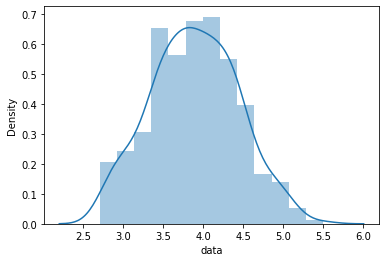

In [5]:
# add to a dataframe
df = pd.DataFrame(data, columns=['data'])
# plot a histogram of the log transformed data that is greater than 100
sns.distplot(df[df['data'] > 100]['data'].pipe(np.log10), kde=True, rug=False)

In [6]:
# label the first 149 points as plate 1 and the rest as plate 2
plate = np.zeros((csv.size, 1))
plate[0:149] = 1
plate[149:] = 2
df['plate'] = plate

/Users/rathbunc/Library/Caches/pypoetry/virtualenvs/am-screen-ayjbsmCK-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rathbunc/Library/Caches/pypoetry/virtualenvs/am-screen-ayjbsmCK-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


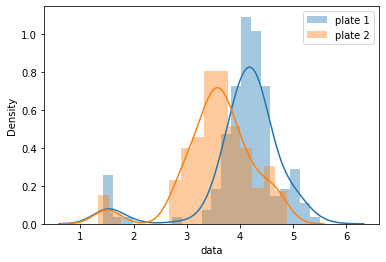

In [7]:
# now plot the histogram of the log transformed data for each plate
sns.distplot(df[df['plate'] == 1]['data'].pipe(np.log10), kde=True, rug=False, label='plate 1')
sns.distplot(df[df['plate'] == 2]['data'].pipe(np.log10), kde=True, rug=False, label='plate 2')
plt.legend()

/Users/rathbunc/Library/Caches/pypoetry/virtualenvs/am-screen-ayjbsmCK-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='data', ylabel='Density'>

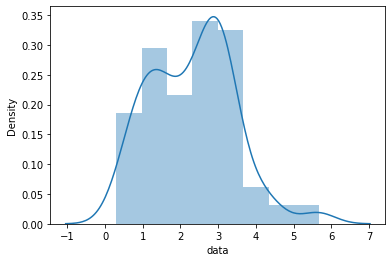

In [8]:
# Do a similar analysis of colonypicktest_N8.csv
# import the data
with open('./data/colonypicktest_N8.csv', 'r', encoding='utf-8-sig') as f: # because of the BOM and excel is stupid
    csv = np.genfromtxt(f, delimiter=',', dtype='int')

# reshape the data
data = csv.T.reshape(csv.size, 1)

# add to a dataframe
df = pd.DataFrame(data, columns=['data'])

# plot a histogram of the log transformed data
sns.distplot(df['data'].pipe(np.log10), kde=True, rug=False)

In [12]:
# label the first 3 points as positive and the second 3 as negative and the rest as experiment
df['condition'] = [
    'positive' if i < 3 else 'negative' if i < 6 else 'experiment' for i in range(csv.size)
]


/Users/rathbunc/Library/Caches/pypoetry/virtualenvs/am-screen-ayjbsmCK-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rathbunc/Library/Caches/pypoetry/virtualenvs/am-screen-ayjbsmCK-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rathbunc/Library/Caches/pypoetry/virtualenvs/am-screen-ayjbsmCK-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a

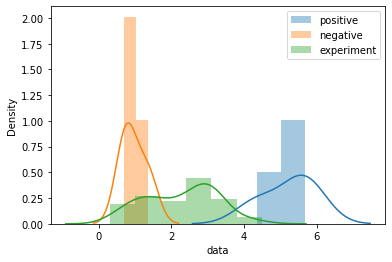

In [15]:
# now plot the histogram of the log transformed data for each condition
sns.distplot(df[df['condition'] == 'positive']['data'].pipe(np.log10), kde=True, rug=False, label='positive')
sns.distplot(df[df['condition'] == 'negative']['data'].pipe(np.log10), kde=True, rug=False, label='negative')
sns.distplot(df[df['condition'] == 'experiment']['data'].pipe(np.log10), kde=True, rug=False, label='experiment')
plt.legend()

In [17]:
# how many points are in the experimental condition and above 100?
df[(df['condition'] == 'experiment') & (df['data'] < 100)].count()

data         36
condition    36
dtype: int64